### Задача

Подготовить исследование рынка по открытым данным о заведениях общественного питания в Москве. Определить популярность в долгосрочной перспективе нового кафе. Проект отличается от других заведений идеей обслуживания гостей роботами.

### Оглавление

[1. Открытие и изучение данных](#1)  
[2. Анализ данных](#2)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.](#2.1)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.2 Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.](#2.2)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.3 Для какого вида объекта общественного питания характерно сетевое распространение?](#2.3)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.4 Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#2.4)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.5 Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.](#2.5)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.6 Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#2.6)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.7 Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#2.7)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.8 Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?](#2.8)  
[3. Вывод](#3)

### Импорт библиотек и настройки

In [1]:
import pandas as pd
import plotly.express as px
import requests
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from plotly import graph_objects as go
from io import BytesIO
 
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
# цветовая палитра, с которой будем работать
colors = ['#3366CC', '#DC3912', '#FF9900', '#109618', '#990099', 
          '#0099C6', '#DD4477','#66AA00', '#B82E2E', '#316395']

### 1. Открытие и изучение данных <a id='1'></a>

In [2]:
rest_data = pd.read_csv('../datasets/rest_data.csv')
rest_data.head(5)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [3]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Названия колонок корректны, типы данных правильные, пропущенных значений нет.

Проверка наличия дубликатов

In [4]:
rest_data.duplicated().sum()

0

### 2. Анализ данных <a id='2'></a>

#### 2.1 Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график. <a id='2.1'></a>

In [5]:
count_object = rest_data.groupby('object_type')['id']\
                        .count()\
                        .reset_index()\
                        .sort_values(by='id', ascending=False)
count_object.head(5)

,object_type,id
3,кафе,6099
8,столовая,2587
7,ресторан,2285
6,предприятие быстрого обслуживания,1923
0,бар,856


Text(0.5, 0, 'count')

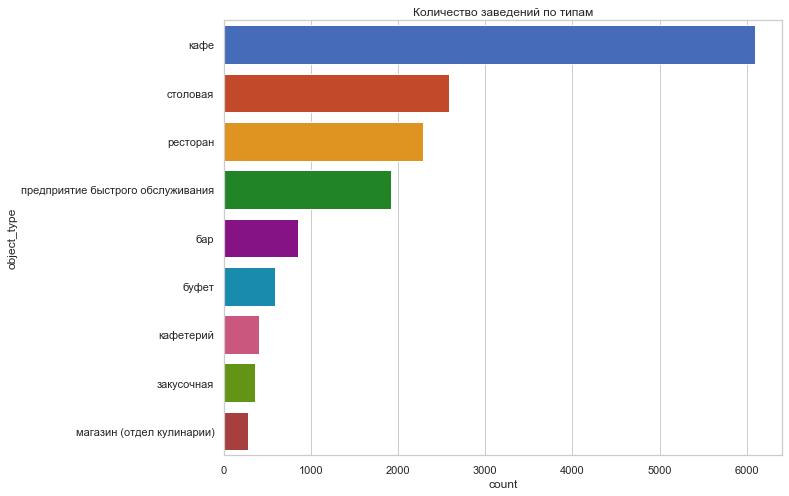

In [6]:
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=count_object, x='id', y='object_type', palette=colors) 
plt.title('Количество заведений по типам')
plt.xlabel('count')

По количеству выделяется кафе. Значит больше всего спрос именно на этот тип заведений. Далее значительное количество у таких типов, как столовая, ресторан и предприятие быстрого обслуживания.

#### 2.2 Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график. <a id='2.2'></a>

In [7]:
rest_data.groupby('object_type')['chain'].value_counts(normalize=True).map(lambda x: '{:.0%}'.format(x))

object_type                        chain
бар                                нет       96%
                                   да         4%
буфет                              нет       98%
                                   да         2%
закусочная                         нет       84%
                                   да        16%
кафе                               нет       77%
                                   да        23%
кафетерий                          нет       87%
                                   да        13%
магазин (отдел кулинарии)          нет       71%
                                   да        29%
предприятие быстрого обслуживания  нет       59%
                                   да        41%
ресторан                           нет       76%
                                   да        24%
столовая                           нет      100%
                                   да         0%
Name: chain, dtype: object

Преобладают несетевые заведения. В кафе 77% несетевых и 23% сетевых.

Создадим датафрейм с количеством заведений и построим график.

In [8]:
count_chain_object = rest_data.groupby(['object_type','chain'])['id']\
            .count()\
            .reset_index()\
            .sort_values(by='id', ascending=False)
count_chain_object.head(5)

,object_type,chain,id
7,кафе,нет,4703
17,столовая,нет,2584
15,ресторан,нет,1741
6,кафе,да,1396
13,предприятие быстрого обслуживания,нет,1132


Text(0.5, 0, 'count')

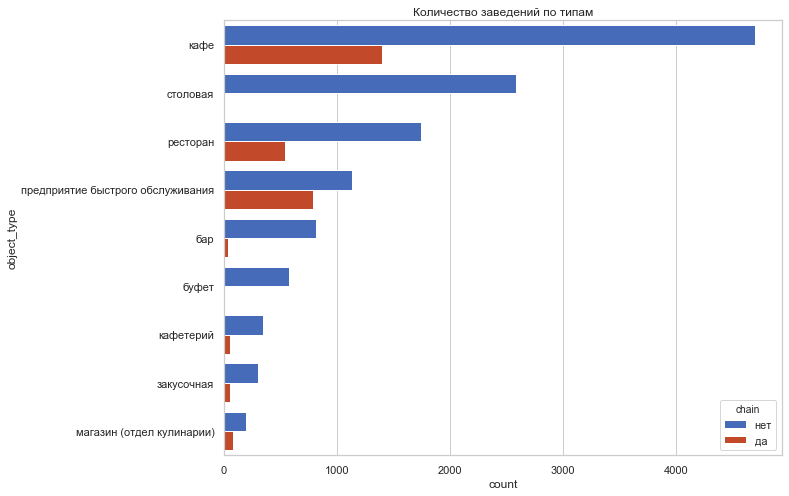

In [9]:
plt.figure(figsize=(10,8))
sns.barplot(x='id',
            y='object_type', 
            hue='chain',
            data=count_chain_object,
           palette=colors)
plt.title('Количество заведений по типам')
plt.xlabel('count')

В Москве преобладают отдельные, несетевые заведения. Поэтому топ несетевых заведений совпадает с общим. А в топе сетевых заведений - кафе, предприятие быстрого обслуживания и ресторан.

#### 2.3 Для какого вида объекта общественного питания характерно сетевое распространение? <a id='2.3'></a>

In [10]:
chain_obj = count_chain_object[count_chain_object['chain'] == 'да']
chain_obj['id'] = (
    chain_obj['id'] / (chain_obj['id'].sum())
).map(lambda x: '{:.0%}'.format(x))
chain_obj

,object_type,chain,id
6,кафе,да,47%
12,предприятие быстрого обслуживания,да,27%
14,ресторан,да,18%
10,магазин (отдел кулинарии),да,3%
4,закусочная,да,2%
8,кафетерий,да,2%
0,бар,да,1%
2,буфет,да,0%
16,столовая,да,0%


Text(0.5, 0, 'count')

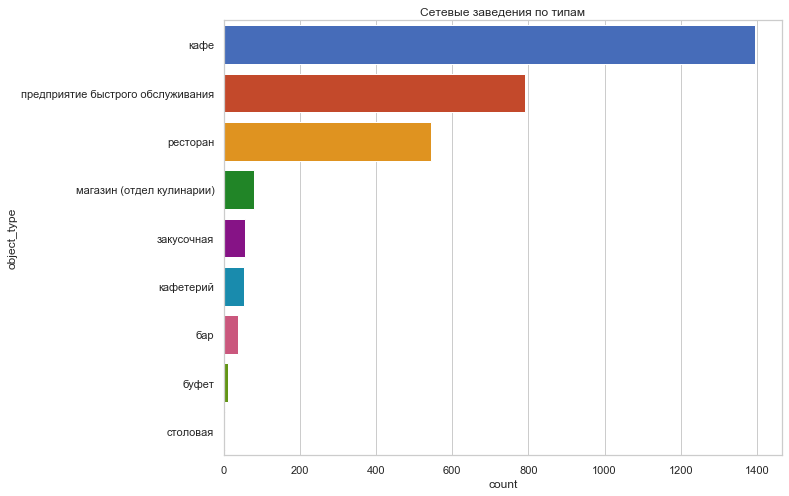

In [11]:
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=count_chain_object[count_chain_object['chain'] == 'да'], 
            x='id', 
            y='object_type', 
            palette=colors) 
plt.title('Сетевые заведения по типам')
plt.xlabel('count')

Почти 1400 сетевых заведений - это кафе (47% от всего числа заведений). Предприятие быстрого обслуживания - около 800 заведений (27%), ресторан - около 550 (18%).

#### 2.4 Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест? <a id='2.4'></a>

Создадим датафрейм с количеством заведений в сети и количеством посадочных мест.

In [12]:
rest_chain_data = rest_data[rest_data['chain'] == 'да']\
                  .groupby('object_name')\
                  .agg({'id':'count', 'number':'mean'})\
                  .reset_index()
rest_chain_data.columns = ['object_name', 'count_object', 'mean_number']
rest_chain_data.head(5)

,object_name,count_object,mean_number
0,Beverly Hills Diner,1,88.000000
1,Bierloga,1,75.000000
2,Black & White,1,40.000000
3,Bocconcino,3,66.666667
4,BooBo,1,46.000000


Рассчитаем основные характеристики выборок.

In [13]:
rest_chain_data.describe()

,count_object,mean_number
count,724.000000,724.000000
mean,4.099448,60.320759
std,12.625954,56.132763
min,1.000000,0.000000
25%,1.000000,20.000000
50%,1.000000,45.000000
75%,2.000000,83.625000
max,155.000000,356.000000


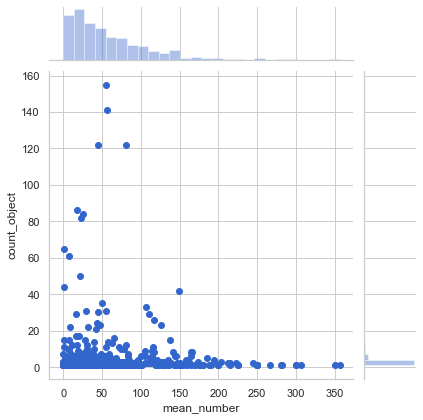

In [14]:
sns.jointplot(x='mean_number', y='count_object', data=rest_chain_data, color='#3366CC')

Для большей части сетевых заведений характерно малое число заведений (не более 5) с большим количеством посадочных мест (в среднем 45).

#### 2.5 Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики. <a id='2.5'></a>

Расчитаем медианные значения количества посадочных мест для каждого типа заведения.

In [15]:
median_number = rest_data.groupby('object_type')\
.agg({'number':'median'})\
.reset_index()\
.sort_values(by='number', ascending=False)
median_number

,object_type,number
8,столовая,103
7,ресторан,80
0,бар,35
1,буфет,32
3,кафе,30
4,кафетерий,6
6,предприятие быстрого обслуживания,5
2,закусочная,0
5,магазин (отдел кулинарии),0


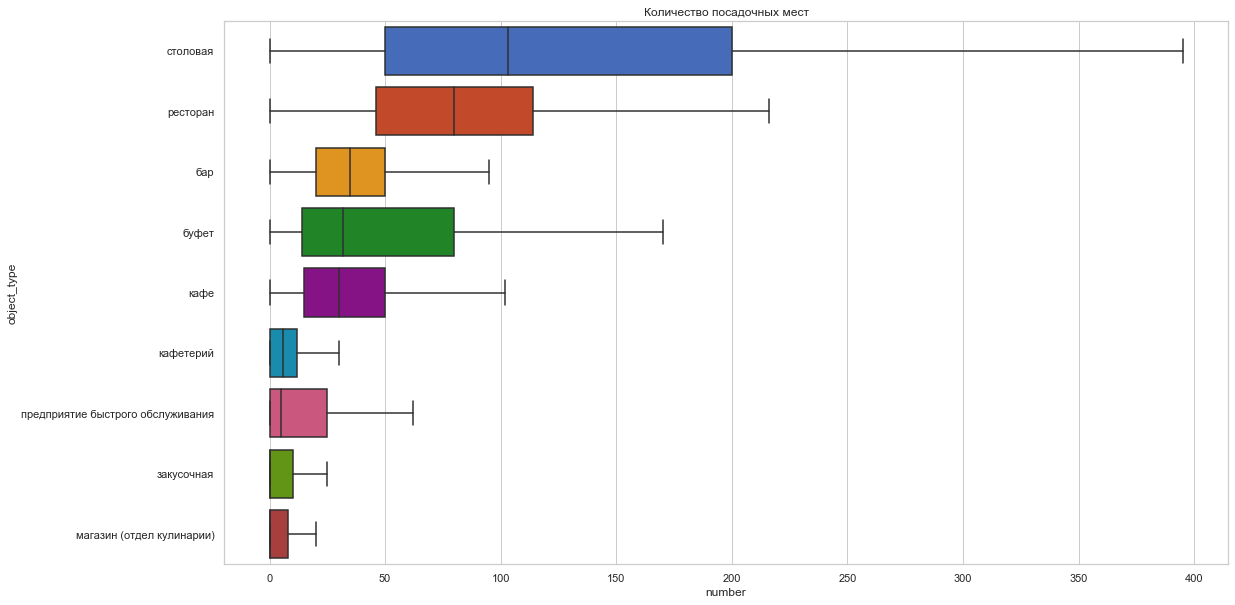

In [16]:
fig = plt.figure(figsize=(18, 10))
sns.boxplot(x='number', 
            y='object_type', 
            data=rest_data,
            order=median_number['object_type'].tolist(), 
            showfliers = False, 
            palette=colors)
plt.title('Количество посадочных мест')
plt.show()

Самое большое количество мест в столовой (в среднем около 100), также большое количество мест в ресторане (около 80). Кафе, буфет и бар близки по средним значениям (30-35). Другие виды заведений имеют преимущественно малое количество мест, либо они отсутствуют.

#### 2.6 Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы? <a id='2.6'></a>

Выделим в отдельный столбец информацию об улице из столбца `address`.

In [17]:
rest_data['street'] = rest_data['address'].str.split(pat=', ',expand=True)[1]

Подгружаем таблицу с адресами Москвы.

In [18]:
spreadsheet_id = '1lC6pukCjj7bdBNiBWqDqAZX3R3ojI5t-YBAoorK2YM8'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=xlsx'.format(spreadsheet_id)
r = requests.get(file_name)
moscow = pd.read_excel(BytesIO(r.content))
moscow = moscow[['address', 'district', 'street']]
moscow.head(5)

,address,district,street
0,"город Москва, Варшавское шоссе, дом 150, строе...",Чертаново Южное,Варшавское шоссе
1,"город Москва, Косинская улица, дом 26А",Вешняки,Косинская улица
2,"город Москва, Гороховский переулок, дом 21",Басманный,Гороховский переулок
3,"город Москва, Тагильская улица, дом 4, строени...",Метрогородок,Тагильская улица
4,"город Москва, Ленинградский проспект, дом 73А,...",Сокол,Ленинградский проспект


По адресу соединим датафреймы для определения района.

In [19]:
data = rest_data.merge(moscow[['address', 'district']], on='address', how='left')
data

,id,object_name,chain,object_type,address,number,street,district
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Ярославский
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,NaN
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,Таганский
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,Лианозово
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,Лианозово
...,...,...,...,...,...,...,...,...
15375,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок,Таганский
15376,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал,Басманный
15377,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал,Басманный
15378,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,поселение Московский,поселение Московский


Посмотрим количество неопределенных районов.

In [20]:
len(data[data['district'].isna()])

1023

In [21]:
na_district = data[data['district'].isna()]
na_district.head()

,id,object_name,chain,object_type,address,number,street,district
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,NaN
13,22579,Алло Пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32,улица Авиаторов,NaN
14,23670,Гимназия 1542,нет,столовая,"город Москва, улица Авиаторов, дом 16",270,улица Авиаторов,NaN
15,23663,Школа 1011,нет,столовая,"город Москва, улица Авиаторов, дом 18",320,улица Авиаторов,NaN
146,24606,Радэа,нет,кафе,"город Москва, Нахимовский проспект, владение 75А",7,Нахимовский проспект,NaN


Дозаполним пропуски. Для неопределенных адресов будем использовать соответствие района по улице. 

In [22]:
for index, street in na_district['street'].items():
    for index_el, el in moscow['street'].items():
        if street == el:
            data['district'][index] = moscow['district'][index_el]
            break    

In [23]:
print('Количество данных без района -', len(data[data['district'].isna()]))
print('Район отсутствует в {:.2%} случаях'.format(len(data[data['district'].isna()]) / len(data)))

Количество данных без района - 102
Район отсутствует в 0.66% случаях


Район не определился в меньше 1% случаев. Удалим данные, так как значительного влияния на выводы это не окажет.

In [24]:
data.dropna(subset=['district'], inplace=True)
print('Количество данных без района -', len(data[data['district'].isna()]))

Количество данных без района - 0


Самые популярные улицы.

In [25]:
top_street = data.groupby(['street'])['id'].count().sort_values(ascending=False).head(12).reset_index()
top_street

,street,id
0,город Зеленоград,232
1,проспект Мира,204
2,Профсоюзная улица,182
3,Ленинградский проспект,171
4,Пресненская набережная,167
5,Варшавское шоссе,161
6,Ленинский проспект,147
7,поселение Сосенское,138
8,проспект Вернадского,132
9,Кутузовский проспект,114


Удалим города и поселения.

In [26]:
top_street.drop(top_street.index[[0, 7]], inplace=True)
top_street = top_street.reset_index(drop=True)
top_street

,street,id
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,161
5,Ленинский проспект,147
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


Построим график топ-10 улиц по количеству объектов общественного питания.

Text(0.5, 0, 'count')

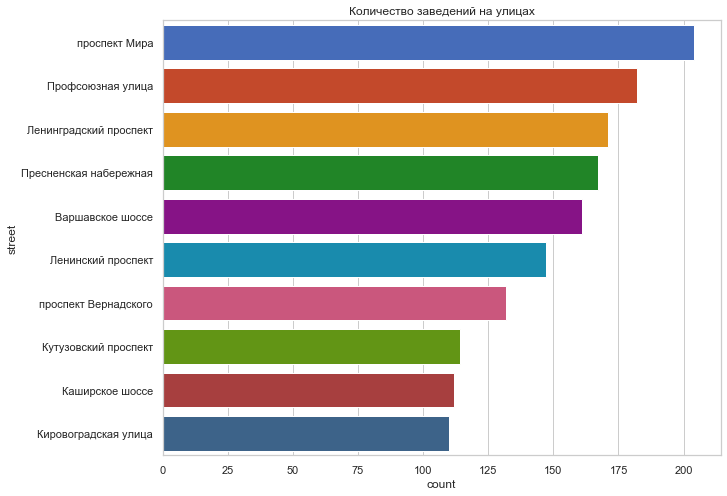

In [27]:
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=top_street, x='id', y='street', palette=colors) 
plt.title('Количество заведений на улицах')
plt.xlabel('count')

In [28]:
data[data['street'].isin(top_street['street'].tolist())]['district'].value_counts().head(10)

Пресненский              167
Чертаново Центральное     92
Тропарево-Никулино        89
Аэропорт                  65
Обручевский               64
Мещанский                 63
Свиблово                  62
Дорогомилово              61
Нагатино-Садовники        58
Фили-Давыдково            53
Name: district, dtype: int64

Самые популярные районы.

In [29]:
top_district = data.groupby(['district'])['id'].count().sort_values(ascending=False).head(10).reset_index()
top_district

,district,id
0,Тверской,774
1,Пресненский,718
2,Басманный,628
3,Даниловский,461
4,Замоскворечье,389
5,Хамовники,371
6,Мещанский,349
7,Таганский,336
8,Арбат,268
9,Хорошевский,257


Построим график топ-10 районов по количеству объектов общественного питания.

Text(0.5, 0, 'count')

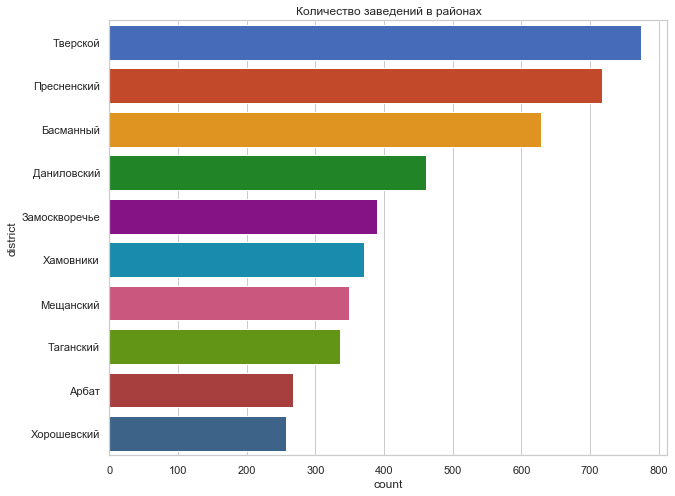

In [30]:
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=top_district, x='id', y='district', palette=colors) 
plt.title('Количество заведений в районах')
plt.xlabel('count')

Районы по топ-10 улиц по большей части отличаются от топ-10 районов. Концентрация заведений в определенных районах больше, чем концентрация заведений по конкретным улицам, которые входят в сразу несколько районов. Поэтому для районов будем ориентироваться не на топ-10 улиц, а на топ-10 районов.

#### 2.7 Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы? <a id='2.7'></a>

In [31]:
street_with_1object = data.groupby('street')['id'].count().sort_values().reset_index()
street_with_1object = street_with_1object[street_with_1object['id'] == 1]
print('Количество улиц с одним объектом общественного питания -',len(street_with_1object))
street_with_1object.head(10)

Количество улиц с одним объектом общественного питания - 533


,street,id
0,Малый Саввинский переулок,1
1,Верхняя улица,1
2,улица Советской Армии,1
3,Садовнический проезд,1
4,Винницкая улица,1
5,улица Малая Ордынка,1
6,Садовая-Сухаревская улица,1
7,Сверчков переулок,1
8,улица Малые Каменщики,1
9,Русаковская набережная,1


Найдем районы, включающие в себя улицы с одним объектом общественного питания.

In [32]:
distr_with_1object = data[data['street'].isin(street_with_1object['street'].tolist())]['district']\
                     .value_counts().reset_index()
distr_with_1object.columns = ['district', 'count_street']
distr_with_1object.head(10)

,district,count_street
0,Таганский,28
1,Хамовники,26
2,Басманный,22
3,Тверской,20
4,Пресненский,19
5,Марьина Роща,17
6,Сокольники,15
7,Лефортово,12
8,Соколиная Гора,12
9,Замоскворечье,12


Популярные районы тоже попали в список. Они тоже содержат переулки и улицы только с 1 объектом.

#### 2.8 Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить? <a id='2.8'></a>

In [33]:
number_top_street = data[data['street'].isin(top_street['street'].tolist())]['number']
number_top_street.head(10)

152    150
153     36
154     30
155      0
156      2
157     70
166     42
167      5
168      8
169     10
Name: number, dtype: int64

In [34]:
number_top_street.describe()

count    1500.000000
mean       58.020667
std        90.058384
min         0.000000
25%        12.000000
50%        40.000000
75%        75.000000
max      1700.000000
Name: number, dtype: float64

(0, 500)

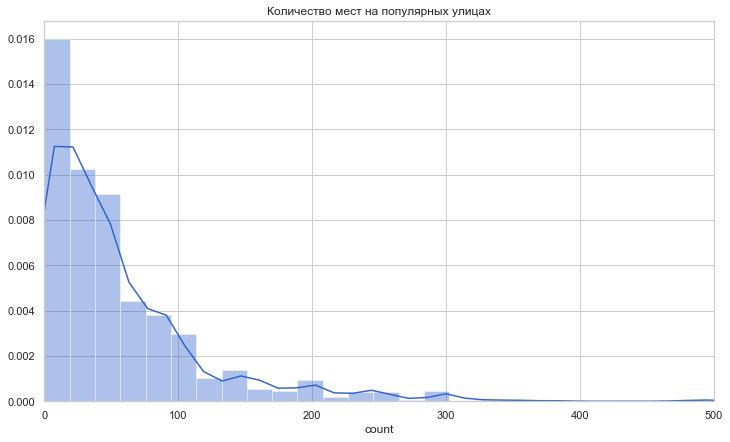

In [35]:
fig = plt.figure(figsize=(12, 7))
sns.distplot(number_top_street, bins=90, color='#3366CC') 
plt.title('Количество мест на популярных улицах')
plt.xlabel('count')
plt.xlim(0,500)

Распределение нормальное с пиком около 15. В среднем, количество мест на популярных улицах(40) на 5 меньше, чем количество мест на всех улицах (45). 

<a class="anchor" id="0-bullet">

### Вывод <a id='3'></a>

По результатам анализа можно выделить следующие характеристики:  
* самый часто встречаемый вид заведения - это кафе, значит кафе пользуются большей популярностью;
* несетевых заведений по Москве больше, по кафе отмечено 77% несетевых и 23% сетевых;
* количество посадочных мест, в среднем для кафе - 30, самое частое количество - около 20;  
* на улицах и в районах с самым большим количеством заведений большая проходимость людей и спрос, поэтому лучше выбрать из таких популярных мест.  
ТОП-10 районов: Тверской, Пресненский, Басманный, Даниловский, Замоскворечье, Хамовники, Мещанский, Таганский, Арбат, Хорошевский.  
ТОП-10 улиц: проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица.

Презентация: <https://drive.google.com/file/d/1ljC45MWJv3-BVFF5YrtsedqkdMG_LvsF/view?usp=sharing>